In [1]:
#use this to retrieve L3 and display monthly

In [2]:
import earthaccess
import xarray as xr
auth = earthaccess.login()
# are we authenticated?
if not auth.authenticated:
    # ask for credentials and persist them in a .netrc file
    auth.login(strategy="interactive", persist=True)

In [3]:
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L3M_LANDVI',
    temporal = ("2024-03-01", "2025-12-31"), #use larger memory to avoid crash
    granule_name="*.MO.*.4km.*"
)
fileset = earthaccess.open(results)
ds = xr.open_dataset(fileset[1])

QUEUEING TASKS | :   0%|          | 0/21 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/21 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/21 [00:00<?, ?it/s]

In [4]:
results

[Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3M_LANDVI'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'EastBoundingCoordinate': 180, 'NorthBoundingCoordinate': 90, 'SouthBoundingCoordinate': -90, 'WestBoundingCoordinate': -180}]}}}
 Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-03-31T23:59:59Z', 'BeginningDateTime': '2024-03-05T00:00:00Z'}}
 Size(MB): 317.3418445587158
 Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240301_20240331.L3m.MO.LANDVI.V3_1.4km.nc'],
 Collection: {'ShortName': 'PACE_OCI_L3M_LANDVI', 'Version': '3.1'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'SouthBoundingCoordinate': -90, 'NorthBoundingCoordinate': 90, 'WestBoundingCoordinate': -180, 'EastBoundingCoordinate': 180}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2024-04-01T00:00:00Z', 'EndingDateTime': '2024-04-30T23:59:59Z'}}
 Size(MB): 278.57926

In [5]:
# We can open all the files but note there is no time coordinate so we need
# combine="nested" and concat_dim
ds = xr.open_mfdataset(
    fileset,
    combine="nested",
    concat_dim="time")
ds

<xarray.Dataset> Size: 31GB
Dimensions:  (time: 21, lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: time, rgb, eightbitcolor
Data variables:
    ndvi     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    evi      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndwi     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndii     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cci      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndsi     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    pri      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cire     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    car      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    mari     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 16kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20240301_20240331.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.1
    data_bins:                         10795892
    data_minimum:                      -783.1385
    data_maximum:                      401.07227

In [6]:
# Let's add the time coord since we will likely want to subset on time later
import pandas as pd
t = pd.date_range(start="2024-03-01", end="2025-11-30", freq="MS")
ds = ds.assign_coords(time=t)
ds

<xarray.Dataset> Size: 31GB
Dimensions:  (time: 21, lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * time     (time) datetime64[ns] 168B 2024-03-01 2024-04-01 ... 2025-11-01
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    ndvi     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    evi      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndwi     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndii     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cci      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndsi     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    pri      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cire     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    car      (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    mari     (time, lat, lon) float32 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 16kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20240301_20240331.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.1
    data_bins:                         10795892
    data_minimum:                      -783.1385
    data_maximum:                      401.07227

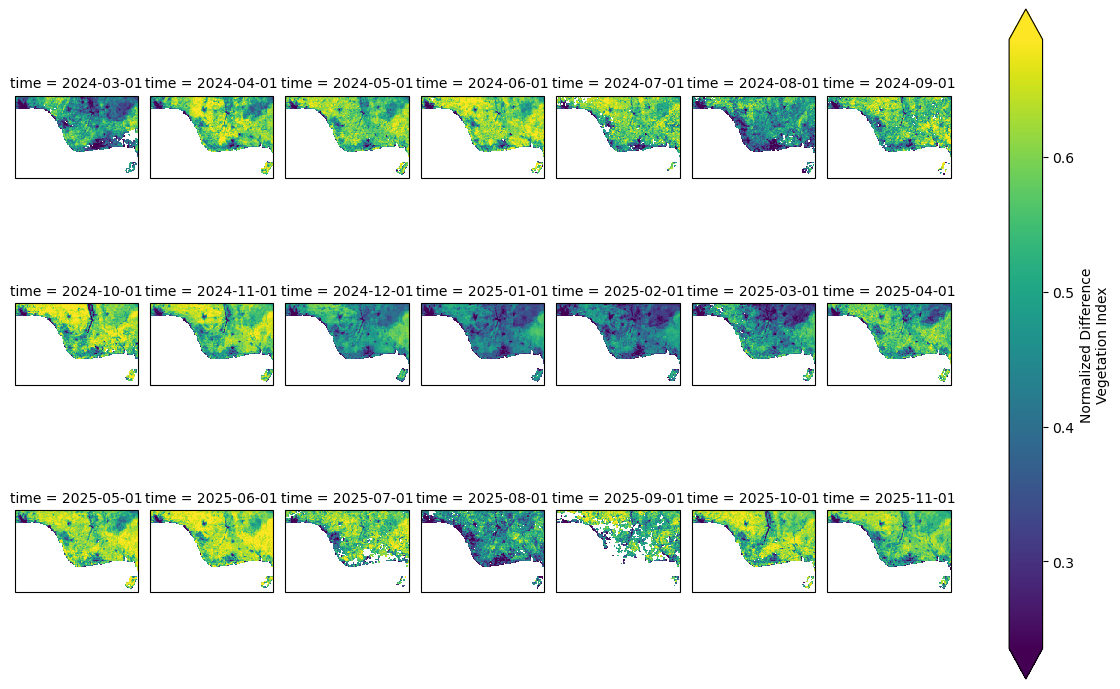

In [7]:
#caution, use larger memory to avoidcrash

ndvi = ds["ndvi"].sel(
    lat=slice(7, 3), 
    lon=slice(3, 9)
)

import cartopy.crs as ccrs
ndvi.plot(
    col="time",            # one panel per month
    col_wrap=7,            # 4 columns per row
    robust=True,           # ignore outliers for color scale
    figsize=(12, 7),
    subplot_kws={"projection": ccrs.PlateCarree()},
    transform=ccrs.PlateCarree()
)

In [8]:
ds["ndvi"]

<xarray.DataArray 'ndvi' (time: 21, lat: 4320, lon: 8640)> Size: 3GB
dask.array<concatenate, shape=(21, 4320, 8640), dtype=float32, chunksize=(1, 512, 1024), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 168B 2024-03-01 2024-04-01 ... 2025-11-01
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Normalized Difference Vegetation Index
    standard_name:  normalized_difference_vegetation_index
    valid_min:      -1000.0
    valid_max:      1000.0
    display_scale:  linear
    display_min:    -0.05
    display_max:    0.9152

### Getting spectral information
1. Get random points (n=100) inside mangrove shapefile. Each with minimum radius of 2km to avoid overlap
2. Extract the spectral information on each point
3. Visualize the spectral information across 100 points
4. Calculate the mean band value and visualize it


In [9]:
import os
import geopandas as gpd

shp_path = os.path.join("/home/jovyan/2026-proj-blue-carbon/data/extracted_mangrove/points_mangrove2.shp")

gdf = gpd.read_file(shp_path)
gdf


,id,geometry
0,0,POINT (-10185924.496 6131629.471)
1,1,POINT (-10214793.95 5962069.4)
2,2,POINT (-10151434.736 5889677.407)
3,3,POINT (-10229469.887 6060364.312)
4,4,POINT (-10060962.21 5807838.93)
...,...,...
95,95,POINT (-10169464.487 6116006.761)
96,96,POINT (-10044450.271 5728379.671)
97,97,POINT (-10064037.632 5798072.397)
98,98,POINT (-10246866.481 6050630.839)


In [10]:
import pandas as pd

# Load ship data
track_df = pd.read_csv("/home/jovyan/2026-proj-blue-carbon/data/extracted_mangrove/mangrove_points.csv")
print(track_df.columns.tolist())
track_df

['id', 'x', 'y']


,id,x,y
0,0,5.474937,5.579239
1,1,6.511257,4.419668
2,2,7.287159,4.550484
3,3,5.773938,4.831105
4,4,8.252555,4.845064
...,...,...,...
95,95,5.655955,5.633314
96,96,8.863505,4.533292
97,97,8.304398,4.764856
98,98,5.763995,4.632289


In [11]:
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L3M_SFREFL',
    temporal = ("2024-03-01", "2024-03-31"),
    granule_name="*.MO.*.4km.*"
)

fileset = earthaccess.open(results)
ds1 = xr.open_dataset(fileset[0])

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
ds1 = xr.open_dataset(fileset[0])
ds1

<xarray.Dataset> Size: 18GB
Dimensions:     (lat: 4320, lon: 8640, wavelength: 122, rgb: 3,
                 eightbitcolor: 256)
Coordinates:
  * lat         (lat) float32 17kB 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon         (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * wavelength  (wavelength) float64 976B 346.0 351.0 ... 2.131e+03 2.258e+03
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    rhos        (lat, lon, wavelength) float32 18GB ...
    palette     (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                      PACE_OCI.20240301_20240331.L3m.MO.SFRE...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/SFREFL/3.1
    data_bins:                         31469390
    data_minimum:                      -0.049858075
    data_maximum:                      1.5

In [13]:
for i, (lat, lon) in enumerate(track_df, start=1):
    pt = ds1["rhos"].sel(lat=lat, lon=lon, method="nearest")
    pt.plot.line(x="wavelength", label=f"Point {i}")   
plt.ylabel("rhos")
plt.legend()
plt.show()

ValueError: could not convert string to float: np.str_('i')

In [14]:
track_df.dtypes
track_df.head()
#track_df.len()

,id,x,y
0,0,5.474937,5.579239
1,1,6.511257,4.419668
2,2,7.287159,4.550484
3,3,5.773938,4.831105
4,4,8.252555,4.845064


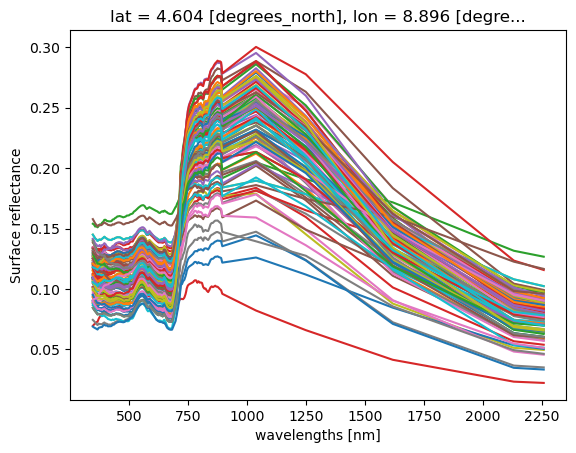

In [15]:
for i, row in track_df.iterrows():
    lat = row["y"]
    lon = row["x"]

    pt = ds1["rhos"].sel(lat=lat, lon=lon, method="nearest")
    pt.plot.line(x="wavelength", label=f"Point {i}")


In [ ]:
for i, row in track_df.iterrows():
    lat = row["x"] #this is incorrect lat lon
    lon = row["y"]

    pt = ds1["rhos"].sel(lat=lat, lon=lon, method="nearest")
    pt.plot.line(x="wavelength", label=f"Point {i}")

In [16]:
spectra = []

for i, row in track_df.iterrows():
    lat = row["x"]
    lon = row["y"]

    pt = ds1["rhos"].sel(
        lat=lat, 
        lon=lon, 
        method="nearest")

    spectra.append(pt)


In [17]:
import xarray as xr

spectra_da = xr.concat(spectra, dim="points")


In [18]:
spectra_da

<xarray.DataArray 'rhos' (points: 100, wavelength: 122)> Size: 49kB
array([[0.13940832, 0.13772403, 0.13691142, ..., 0.17257465, 0.10834996,
        0.10162495],
       [0.13200027, 0.12832686, 0.12515573, ..., 0.23644401, 0.12983139,
        0.1198639 ],
       [0.08699939, 0.08594388, 0.08583164, ..., 0.19212656, 0.09977195,
        0.0958228 ],
       ...,
       [0.10279489, 0.10250877, 0.10239989, ..., 0.32730573, 0.25327036,
        0.24049912],
       [0.04920933, 0.05087051, 0.0522574 , ..., 0.03221713, 0.0250025 ,
        0.02292809],
       [0.0992574 , 0.09934717, 0.09978589, ..., 0.32764122, 0.25890902,
        0.24581717]], shape=(100, 122), dtype=float32)
Coordinates:
  * wavelength  (wavelength) float64 976B 346.0 351.0 ... 2.131e+03 2.258e+03
    lat         (points) float32 400B 5.479 6.521 7.271 ... 8.312 5.771 8.896
    lon         (points) float32 400B 5.563 4.438 4.563 ... 4.771 4.646 4.604
Dimensions without coordinates: points
Attributes:
    long_name:      Surface reflectance
    valid_min:      -0.05
    valid_max:      1.5
    display_scale:  linear
    display_min:    0.0
    display_max:    0.0

In [19]:
mean_spec = spectra_da.mean(dim="points")


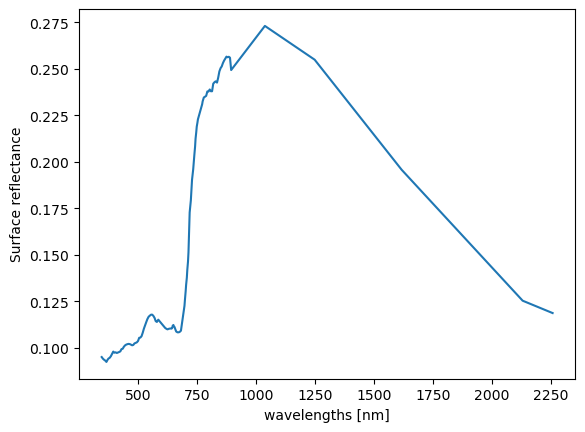

In [20]:
mean_spec.plot.line(x="wavelength")


In [ ]:
 pt.plot.line(x="wavelength", label=f"Point {i}")

In [ ]:
mean = spectra_da.mean("points")
std  = spectra_da.std("points")

mean.plot.line(x="wavelength")
(mean + std).plot.line(x="wavelength", linestyle="--")
(mean - std).plot.line(x="wavelength", linestyle="--")


In [21]:
#load mangrove boundaru
import geopandas as gpd

mangrove = gpd.read_file("/home/jovyan/2026-proj-blue-carbon/data/extracted_mangrove/nigermangrove_dissolved.shp")

# reproject if needed
if mangrove.crs != "EPSG:4326":
    mangrove = mangrove.to_crs("EPSG:4326")


/tmp/ipykernel_663/468832485.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")


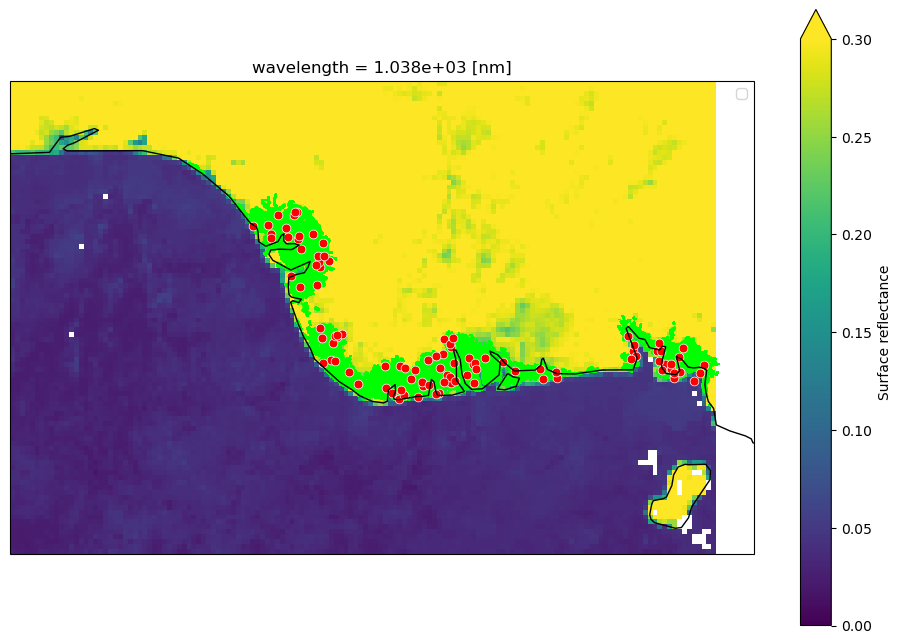

In [24]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


# Niger delta bounds: (lat_max, lat_min, lon_min, lon_max)
ds_nigdelta = ds1.sel(
    lat=slice(7, 3), 
    lon=slice(3, 9)
)

#use wavelength of 1125 based on the spectral characteristic above
Rrs_1125 = ds_nigdelta["rhos"].sel(wavelength=1125.0, method="nearest")

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()})
Rrs_1125.plot(ax=ax, cmap="viridis", add_colorbar=True, vmin=0, vmax=0.3)
ax.coastlines(resolution="50m")

ax.legend(loc="upper right")

mangrove.plot(
    ax=ax,
    facecolor="none",
    edgecolor="lime",
    linewidth=1.2,
    transform=ccrs.PlateCarree(),
    label="Mangrove"
)
ax.scatter(track_df["x"], track_df["y"], s=40, c="red", edgecolor="white", linewidth=0.5, label="Stations")


plt.show()

In [ ]:
Further analysis:
1. Use band ratio
2. create scatter plot of the band value